In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('politicians_sentiment.csv')

In [14]:
class Tweets:
    '''
    DataFrame containing all tweets and popularity per tweet, columns for likes.
    Used to collect create new dataframes to be plotted on streamlit.
    '''
        
    def get_data(self):
        return pd.read_csv('tweets_large_ammended.csv')

    #choose figure
    def by_figure(self, figure_twitter_handle, start = '2021-01-01', finish = '2021-06-01'):
        data = self.get_data()
        by_figure =  data.groupby('figure').get_group(figure_twitter_handle)
        grouped_days = by_figure.groupby('date',as_index=False).agg({'popularity':'sum',
                                                 'likes_count':'sum',
                                                'retweets_count':'sum'})
        return grouped_days[(grouped_days['date']>start) & (grouped_days['date']<finish)]

        
   
    #choose region    
    def get_region(self, regions = []):
        pass
    


In [15]:
start = '2021-04-01'
finish = '2021-06-01'

array([[<AxesSubplot:title={'center':'scores'}>]], dtype=object)

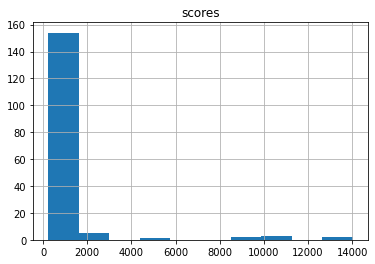

In [20]:
df.groupby('date').agg({'scores':'count'}).hist()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188845 entries, 0 to 188844
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               188845 non-null  int64  
 1   conversation_id  188845 non-null  int64  
 2   date             188845 non-null  object 
 3   username         188845 non-null  object 
 4   tweet            188845 non-null  object 
 5   likes_count      188845 non-null  int64  
 6   hashtags         188845 non-null  object 
 7   retweets_count   188845 non-null  int64  
 8   geo              188845 non-null  object 
 9   figure           188845 non-null  object 
 10  scores           188845 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 15.8+ MB


In [17]:
df.geo.value_counts()

London                      64079
North West (England)        27272
Scotland                    19455
West Midlands (England)     16909
North East (England)        12945
East of England             12024
East Midlands (England)     10477
South West (England)         7128
Wales                        5707
South East (England)         5311
Yorkshire and The Humber     4222
Northern Ireland             3316
Name: geo, dtype: int64

In [28]:
pols = list(df.figure.unique())

In [32]:
test = pols[:2]
test

['borisjohnson', 'angelarayner']

In [53]:
for i in list(df.figure.unique()):
    if i in test:
        print('yes')

yes
yes


In [54]:
pol = 'keir_starmer'

In [58]:
df.loc[(df['figure']==pol), ['date','figure']]

,date,figure
115205,2021-06-16,keir_starmer
115206,2021-06-16,keir_starmer
115207,2021-06-16,keir_starmer
115208,2021-06-16,keir_starmer
115209,2021-06-16,keir_starmer
...,...,...
136678,2021-01-03,keir_starmer
136679,2021-01-03,keir_starmer
136680,2021-01-03,keir_starmer
136681,2021-01-03,keir_starmer


In [5]:
pritipatel = Tweets().by_figure('pritipatel', start = start).head(2)

/Users/danielmarron/.pyenv/versions/le_kingmakers/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
matthancock = Tweets().by_figure('matthancock', start=start)

/Users/danielmarron/.pyenv/versions/le_kingmakers/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
figures = ['matthancock','pritipatel']

In [8]:
df.head(3)

,Unnamed: 0,id,date,tweet,replies_count,retweets_count,likes_count,hashtags,geo,figure,clean,popularity
0,0,1404799962400145420,2021-06-15,It’s time for people to ignore that lunatic @B...,0,0,0,"['riseup', 'enoughisenough', 'borisout', 'revo...",Northern Ireland,borisjohnson,It’s time for people to ignore that lunatic @u...,-0.875903
1,1,1404796750146252800,2021-06-15,North East councils have backed Boris Johnson’...,0,0,0,[],Northern Ireland,borisjohnson,North East councils have backed Boris Johnson’...,0.065623
2,2,1404796099144171529,2021-06-15,North East councils have backed Boris Johnson’...,0,0,0,[],Northern Ireland,borisjohnson,North East councils have backed Boris Johnson’...,0.065623


In [72]:
df.geo.value_counts()

Northern Ireland            115247
London                       15489
North West (England)          5593
Scotland                      3395
West Midlands (England)       2920
East Midlands (England)       2220
North East (England)          1991
East of England               1970
South East (England)          1183
South West (England)           999
Wales                          975
Yorkshire and The Humber       840
geo                              1
Name: geo, dtype: int64

In [12]:
df_geos = list(df.geo.unique())
df_geos

['Northern Ireland',
 'North East (England)',
 'North West (England)',
 'Yorkshire and The Humber',
 'East Midlands (England)',
 'West Midlands (England)',
 'East of England',
 'London',
 'South East (England)',
 'South West (England)',
 'Wales',
 'Scotland',
 'geo']

In [13]:
json_geos =['UKC', 'UKD', 'UKE', 
    'UKF', 'UKG', 'UKH', 'UKI', 
    'UKJ', 'UKK', 'UKL', 'UKM', 'UKN']

In [15]:
# convert into this so can be used in json
geo_dict = {'North East (England)': 'UKC',
            'North West (England)': 'UKD',
            'Yorkshire and The Humber': 'UKE',
            'East Midlands (England)': 'UKF',
            'West Midlands (England)': 'UKG',
            'East of England': 'UKH',
            'London': 'UKI',
            'South East (England)': 'UKJ',
            'South West (England)': 'UKK',
            'Wales': 'UKL', 'Scotland': 'UKM',
            'Northern Ireland': 'UKN'}

In [16]:
geo_group = df.groupby('geo')

In [18]:
figure = 'pritipatel'

In [30]:
geo_locations = ['Northern Ireland',
 'North East (England)',
 'North West (England)',
 'Yorkshire and The Humber',
 'East Midlands (England)',
 'West Midlands (England)',
 'East of England',
 'London',
 'South East (England)',
 'South West (England)',
 'Wales',
 'Scotland']

In [65]:
test_df.geo.unique()

array(['Northern Ireland'], dtype=object)

In [67]:
#get figure data first
#could nest this and 

test_df = df[df.figure=='matthancock']
test_df = test_df[['date','geo','retweets_count','likes_count','popularity']]
temp_group = test_df.groupby('geo')


# geo_concat=[]
# for geo in geo_locations:
#     df_ = temp_group.get_group(geo)
#     df_ = df_[(df_['date']>start) & (df_['date']<finish)]
#     df_ = df_.groupby('geo',as_index=False).agg({'popularity':'mean'})
#     geo_concat.append(df_)

# geo_data = pd.concat(geo_concat,axis=0)
# geo_data.geo = geo_data.geo.map(geo_dict)     

In [71]:
test_df.geo.unique()

array(['Northern Ireland'], dtype=object)

In [62]:
geo_data

,geo,popularity
0,UKN,-0.460944
0,UKC,-0.409050
0,UKD,-0.455194
0,UKE,-0.440052
0,UKF,-0.415129
0,UKG,-0.433302
0,UKH,-0.313265
0,UKI,-0.392560
0,UKJ,-0.406514
0,UKK,-0.468024


In [37]:
concat_list = []
for figure in chosen_figures:
    df_ = figures_group.get_group(figure)
    df_ = df_[(df_['date']>start) & (df_['date']<finish)]
    df_ = df_.groupby('date').agg({'popularity':'sum'})
    df_['figure'] = figure
    concat_list.append(df_)

NameError: name 'temp_group' is not defined

In [20]:
df[df['figure']=='kierstarmer'].shape

(72, 12)

In [105]:
test = pd.read_csv('for_streamlit.csv')

In [149]:
matthancock.head().set_index('date')

,popularity,likes_count,retweets_count
date,,,
2021-04-02,63.5,93,24
2021-04-03,-70.0,132,9
2021-04-04,-36.0,52,9
2021-04-05,-25.5,81,8
2021-04-06,431.5,601,164


In [160]:
%time
fg = list(tweets.get_data().figure.unique())[:4]

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 10 µs


In [353]:
# popularity_df = pd.DataFrame()

def get_popularity(list_of_figures):
    emp_df = sorted(Tweets().get_data()['date'].unique())
    emp_df = pd.DataFrame(emp_df,columns=['date'])
    for figure in list_of_figures:
        fig_tweets = Tweets().by_figure(figure)
        fig_tweets = fig_tweets.rename({'popularity':figure},axis=1)
        fig_tweets = fig_tweets[['date',figure]]
        emp_df = emp_df.merge(fig_tweets, on='date')
    return emp_df


In [354]:
get_popularity(test_list)

,date,borisjohnson,grantshapps
0,2021-01-02,13.0,-1.5
1,2021-01-03,-205.5,-11.0
2,2021-01-04,-4392.5,-9.0
3,2021-01-05,-1661.5,1.0
4,2021-01-06,-1355.0,-5.5
...,...,...,...
141,2021-05-26,6508.5,643.0
142,2021-05-27,4723.5,-147.0
143,2021-05-28,362.5,-13.5
144,2021-05-29,-53.5,-22.0


In [320]:
test_list = fg[2:5]
test_list

['borisjohnson', 'grantshapps']

In [19]:
chosen_figures = [0,1,2,3,4]
length = len(chosen_figures)
def func(length):
    num_figures = len(chosen_figures)
    num_index=[]
    for num in range(num_figures):
        num_index.append(f"p{num}")
    return num_index

In [48]:
[','.join(func(4))]

['p0,p1,p2,p3,p4']

In [35]:
variables = func(len(chosen_figures))

In [36]:
def joins(variables):
    return ','.join(variables)


In [44]:
joins(variables)

'p0,p1,p2,p3,p4'

In [43]:
locals()[joins(variables)]= 1,2,3,4

In [30]:
x = func(4)
for i in range(len(x)):
    print(x[i])

p0
p1
p2
p3
p4


In [18]:

x = print(",".join(num_index))
x

p0,p1,p2,p3,p4


In [322]:
get_popularity(test_list)


,date
0,2021-06-12
1,2021-06-12
2,2021-06-12
3,2021-06-12
4,2021-06-12
...,...
120630,2021-01-01
120631,2021-01-01
120632,2021-01-01
120633,2021-01-01


In [286]:
gs = get_popularity(test_list)

In [288]:
bj = get_popularity(['borisjohnson'])

In [291]:
gs.merge(bj,how='outer', on='date')


,date,grantshapps,borisjohnson
0,2021-01-02,-1.5,13.0
1,2021-01-03,-11.0,-205.5
2,2021-01-04,-9.0,-4392.5
3,2021-01-05,1.0,-1661.5
4,2021-01-06,-5.5,-1355.0
...,...,...,...
145,2021-05-30,-2.0,878.5
146,2021-01-20,NaN,3.0
147,2021-05-02,NaN,-743.0
148,2021-05-05,NaN,1681.5


In [290]:
bj.shape

(150, 2)

In [230]:
t_ = Tweets().by_figure(fg[0])
t_.rename({'popularity':'teststests'},axis=1,inplace=True)
t_ = t_[['date','teststests']]
t_

,date,teststests
1,2021-01-02,-21.5
2,2021-01-03,14.0
3,2021-01-04,62.5
4,2021-01-05,6.0
5,2021-01-06,11.0
...,...,...
143,2021-05-27,49.5
144,2021-05-28,-1.5
145,2021-05-29,91.0
146,2021-05-30,-7.0


In [167]:
x = Tweets().by_figure('AngelaRayner')
x.head(2)

,date,popularity,likes_count,retweets_count
1,2021-01-02,-21.5,59,16
2,2021-01-03,14.0,16,3


In [170]:
y = Tweets().by_figure('grantshapps')
y.rename({'popularity':'grantshapps'},axis=1,inplace=True)
y.head(2)

,date,grantshapps,likes_count,retweets_count
1,2021-01-02,-1.5,13,0
2,2021-01-03,-11.0,20,8
